
***
***

# R2.07
## TP4. MST
***
***

In this practical, all graphs will be unoriented

***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

We recall a few useful functions


In [2]:
W=np.array([
 [0     , 2.5   , 1     , np.inf, np.inf, .5    , .5     , 3      ],
 [ 2.5  , 0     , 1.5   , np.inf, 2     , 8     , np.inf ,np.inf  ],
 [  1   , 1.5   , 0     , np.inf, np.inf, np.inf, np.inf ,np.inf  ],
 [np.inf, np.inf, np.inf, 0     ,  1    , np.inf , 5     , np.inf ],
 [np.inf, 2     , np.inf, 1     ,  0    , np.inf, 5      , np.inf ],
 [.5    , 8     , np.inf, np.inf, np.inf, 0     , 1      , 2 ],
 [.5    , np.inf, np.inf, 5     , 5     , 1     , 0      , np.inf ],
 [3     , np.inf, np.inf, np.inf, np.inf, 2     , np.inf ,0       ]]) # type: ignore


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A=np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j]==np.inf:
                A[i][j]=0
            else :
                if W[i][j]==0:
                    if i!=j:
                        A[i][j]=1
                        print("Warning: a weight is equal to 0")
                    else : 
                        if loop :
                            A[i][j]=1
                        else :
                            A[i][j]=0


                else :
                    A[i][j]=1

    return A

def ToWeight(A):
    """
    Converts an  adjacency matrix to the corresponding weight matrix
    
    :param A: adjacency matrix
    :type A: two dimensionnal numpy array
    :return:  weight matrix 
    :rtype: two dimensionnal numpy array
    
    """
    n=A.shape[0]
    W=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if A[i][j]==0:
                W[i][j]=np.inf
            else :
                W[i][j]=1

    return W

print(W)
A=ToAdj(W)

print(A)



[[0.  2.5 1.  inf inf 0.5 0.5 3. ]
 [2.5 0.  1.5 inf 2.  8.  inf inf]
 [1.  1.5 0.  inf inf inf inf inf]
 [inf inf inf 0.  1.  inf 5.  inf]
 [inf 2.  inf 1.  0.  inf 5.  inf]
 [0.5 8.  inf inf inf 0.  1.  2. ]
 [0.5 inf inf 5.  5.  1.  0.  inf]
 [3.  inf inf inf inf 2.  inf 0. ]]
[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]]


(Weighted)Graph drawing

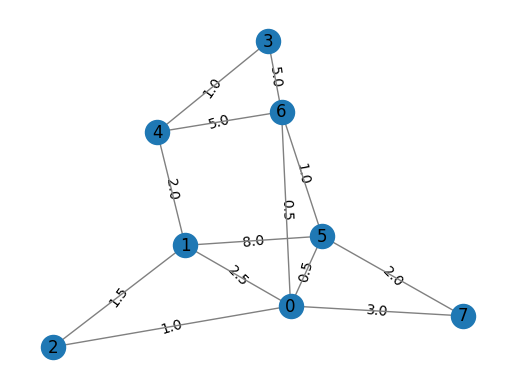

In [3]:
G=nx.from_numpy_array(A)



edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.spring_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)





### Minimal spanning trees
***
**To Do:**

**_question 1_**

**a**  Write a function computing a list of edges, sorted by weight, from a weight matrix


A practical way to know if adding an edge induce a cycle is to create and update an array of connected component. Concretely, one starts with all vertices belonging to no connected component (represented by $-1$, then update the connected component using the following rules :


   - if we add 2 vertices that are not in a connected component yet, asign them to a new connected component
   - if 1 of the two already belong to a connected component $C$, then add the other vertex to $C$
   - if the 2 belong to different components $C$ and $C'$, then put all the vertices of $C'$ in $C$
   - if the 2 belong to the same components $C$, then the edge would create a cycle and therefor should not be added


**b** Write a function computing a minimum spanning tree of a graph given its weight matrix by Kruskal algorithm.




[[0.5, 0, 5], [0.5, 0, 6], [1.0, 0, 2], [1.0, 3, 4], [1.0, 5, 6], [1.5, 1, 2], [2.0, 1, 4], [2.0, 5, 7], [2.5, 0, 1], [3.0, 0, 7], [5.0, 3, 6], [5.0, 4, 6], [8.0, 1, 5]]
[[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


array([[0. , 0. , 1. , 0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 1.5, 0. , 2. , 0. , 0. , 0. ],
       [1. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 5. , 0. ],
       [0. , 2. , 0. , 1. , 0. , 0. , 5. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
       [0.5, 0. , 0. , 5. , 5. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. ]])

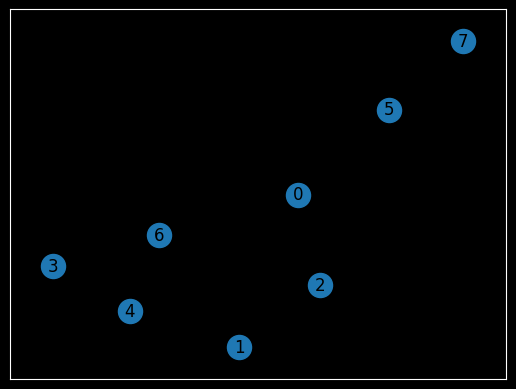

In [17]:


def weightToList(W):
    """
     Return the list of edges sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return:  the list of edges sorted by weight
    :rtype:  list
    """
            
    L=[]
    n = W.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            if W[i][j]!=np.inf:
                L.append([W[i][j],i,j])
    L.sort()
    
    return L



def Kruskal(W):
    """
     Return the MST (adjacency and weight matrices) given a weight matrix

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """
                
    T=np.zeros((W.shape[0],W.shape[0]))
    WT=np.ones((W.shape[0],W.shape[0]))*0 #0 to be able to draw

    L=weightToList(W)
    #list of connected composants (-1 :has been used yet)
    cc=[-1 for  i in range(W.shape[0])]
    
    cc_count=0
    while (len(set(cc)) > 1) or (-1 in cc):
        edge=L[:1]  #equivalent to edge=L[0], uses stack/list structure (old : L.pop())
        if len(edge)==0:
            break
        w, i, j = edge[0]
        if cc[i] == -1 and cc[j] == -1 : #new CC
            cc[i]=cc_count
            cc[j]=cc_count
            cc_count+=1
            T[i][j]=1
            T[j][i]=1
            WT[i][j]=w
            WT[j][i]=w
        else:
            if cc[i] == -1 :
                cc[i]=cc[j]
                T[i][j]=1
                T[j][i]=1
                WT[i][j]=w
                WT[j][i]=w
            elif cc[j] == -1 :
                cc[j]=cc[i]
                T[i][j]=1
                T[j][i]=1
                WT[i][j]=w
                WT[j][i]=w
            elif cc[i] != cc[j] : #merge
                cc[j]=cc[i]
                T[i][j]=1
                T[j][i]=1
                WT[i][j]=w
                WT[j][i]=w
                mincc=min(cc[i],cc[j])
                maxcc=max(cc[i],cc[j])
                for k in range(len(cc)):
                    if cc[k]==maxcc:
                        cc[k]=mincc 
        L=L[1:]

    return T,WT

                   


W=np.array([
 [0     , 2.5   , 1     , np.inf, np.inf, .5    , .5     , 3      ],
 [ 2.5  , 0     , 1.5   , np.inf, 2     , 8     , np.inf ,np.inf  ],
 [  1   , 1.5   , 0     , np.inf, np.inf, np.inf, np.inf ,np.inf  ],
 [np.inf, np.inf, np.inf, 0     ,  1    , np.inf , 5     , np.inf ],
 [np.inf, 2     , np.inf, 1     ,  0    , np.inf, 5      , np.inf ],
 [.5    , 8     , np.inf, np.inf, np.inf, 0     , 1      , 2 ],
 [.5    , np.inf, np.inf, 5     , 5     , 1     , 0      , np.inf ],
 [3     , np.inf, np.inf, np.inf, np.inf, 2     , np.inf ,0       ]]) # type: ignore

A=ToAdj(W)

print(weightToList(W))
T,WT=Kruskal(W)
print(T)
nx.draw_networkx(nx.from_numpy_array(T))
    
WT

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]] [[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]] [[0.  0.  1.  0.  0.  0.5 0.5 0. ]
 [0.  0.  1.5 0.  2.  0.  0.  0. ]
 [1.  1.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  5.  0. ]
 [0.  2.  0.  1.  0.  0.  5.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  2. ]
 [0.5 0.  0.  5.  5.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0. ]]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0] [1.0, 2.0, 1.5, 1.5, 1.0, 2.5, 3.0, 1.0, 2.0, 6.0, 6.0, 1.0, 3.0]


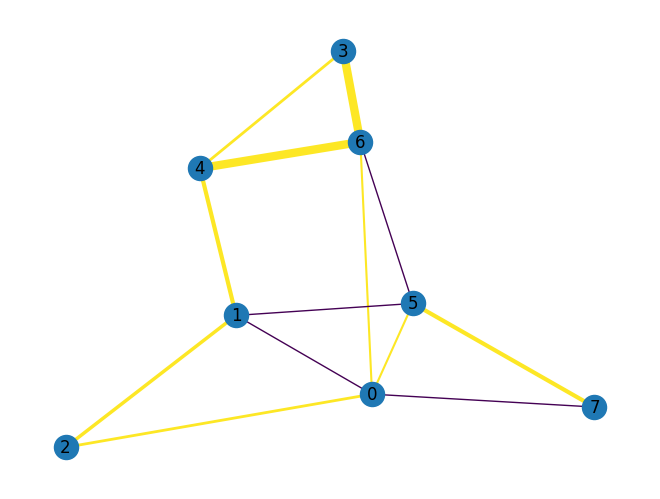

In [18]:
G=nx.from_numpy_array(A)

T,WT=Kruskal(W)


print(A,T,WT)
edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)


colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)


**_question 2_**

**a** Write an algorithm which takes as an input a weight matrix and set of edges $E$ and return the (sorted) list of edges such that one extremity is in $E$ and the other is not.

**b** Write a function computing a minimum spanning tree of a graph given its weight matrix by Prim algorithm.


In [20]:
def outEdges(W,nodes):
    """
     Return the list of edges which have exactly one end in nodes, sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array
    :param nodes: a set of nodes
    :type nodes: set or array     
    :return:  list of edges which have exactly one end in nodes, sorted by weight
    :rtype:  list
    """    
    edges=[]
    n = W.shape[0]

    for i in range(n):
        for j in range(i + 1, n):
            if i in nodes and not j in nodes and W[i][j]!=np.inf:
                edges.append([W[i][j],i,j])
    edges.sort()

    return edges

print(outEdges(W,{0}))



def Prim(W,initial=0):

    """
     Return the MST (adjacency and weight matrices) given a weight matrix

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """

    T=np.zeros((W.shape[0],W.shape[0]))
    WT=np.zeros((W.shape[0],W.shape[0]))

    nodes={initial}  #data structure: set
    while len(nodes) < W.shape[0]:
        edges=outEdges(W,nodes)
        if len(edges)==0:
            break
        w, i, j = edges[0]
        nodes.add(j)
        T[i][j]=1
        T[j][i]=1
        WT[i][j]=w
        WT[j][i]=w

    return T,WT 
    
Prim(W)

[[0.5, 0, 5], [0.5, 0, 6], [1.0, 0, 2], [2.5, 0, 1], [3.0, 0, 7]]


(array([[0., 1., 1., 0., 0., 1., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]),
 array([[0. , 2.5, 1. , 0. , 0. , 0.5, 0.5, 0. ],
        [2.5, 0. , 0. , 0. , 2. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. ]]))

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]] [[0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]] [[0.  2.5 1.  0.  0.  0.5 0.5 0. ]
 [2.5 0.  0.  0.  2.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  2.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0. ]]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0] [3.5, 2.0, 1.5, 1.5, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0]


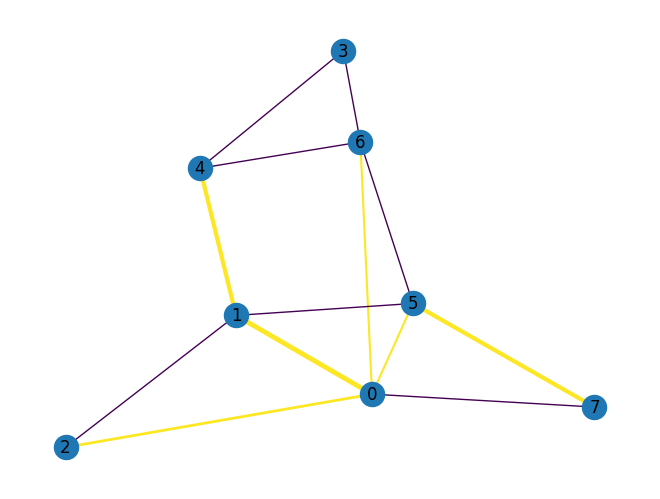

In [21]:
G=nx.from_numpy_array(A)

T,WT=Prim(W)


print(A,T,WT)
edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)


colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)